# Project Overview

Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

# Data Wranglingling

Import neccessary libraries

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import datetime
%matplotlib inline
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

load the dataset

In [2]:
df=pd.read_json("ultimate_data_challenge.json") #load the dataset as pandas dataframe and assign it to df

What does the ultimate data challenge dataset looks like, I will use the .head() function to take a look

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


I want to print out the information about the df including the index dtype and columns, non-null values and memory usage. So I will call the .info() function

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


I want to check for missing values in the dataset

In [5]:
#count the number of missing values
miss_value = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
miss_value.columns=['count', '%']
miss_value.sort_values(by=['%'],ascending=False)

,count,%
avg_rating_of_driver,8122,16.244
phone,396,0.792
avg_rating_by_driver,201,0.402
city,0,0.000
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_surge,0,0.000
last_trip_date,0,0.000
surge_pct,0,0.000
ultimate_black_user,0,0.000


The average rating of driver column is missing about 16% of its data. The phone column is missing 0.792 % and average rating by drivers 0.402%. The rest of the columns aren't missing anything.

There is another dataset called loggins, I need to know what's in it. So I will load the dataset

In [6]:
df_logins=pd.read_json("logins.json") #load the dataset as pandas dataframe and assign it to df_logins
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


I want to print out the information about the df_logins including the index dtype and columns, non-null values and memory usage. So I will call the .info() function

In [7]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Check for missing values

In [8]:
#count the number of missing values
miss_value = pd.concat([df_logins.isnull().sum(), 100 * df_logins.isnull().mean()], axis=1)
miss_value.columns=['count', '%']
miss_value.sort_values(by=['%'],ascending=False)

,count,%
login_time,0,0.0


Awesome, no value is missing in the df_logins.

# Data Cleaning

In [9]:
#any missing value will be replaced with the mean
avgR_of_driver_mean = df["avg_rating_of_driver"].mean()
avgR_by_driver_mean = df["avg_rating_by_driver"].mean()
#phone column is an object so I will replace it with a string instead
phone_miss = "miss_phone"
#Applying the imputation to both  columns
df["avg_rating_of_driver"] = df["avg_rating_of_driver"].fillna(avgR_of_driver_mean)
df["avg_rating_by_driver"] = df["avg_rating_by_driver"].fillna(avgR_by_driver_mean)
df["phone"] = df["phone"].fillna(phone_miss)

Lets see if the missing values were actually replaced.

In [10]:
#count the number of missing values
miss_value = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
miss_value.columns=['count', '%']
miss_value.sort_values(by=['%'],ascending=False)

,count,%
city,0,0.0
trips_in_first_30_days,0,0.0
signup_date,0,0.0
avg_rating_of_driver,0,0.0
avg_surge,0,0.0
last_trip_date,0,0.0
phone,0,0.0
surge_pct,0,0.0
ultimate_black_user,0,0.0
weekday_pct,0,0.0


Perfect! All missing values has been replaced. Hence both dataframe are ready for the next phase, exploratory data analysis.

# Part 1 ‑ Exploratory data analysis

Part 1 tasks: "Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.""

In [11]:
df_logins.columns

Index(['login_time'], dtype='object')

In [12]:
df_logins['login_time'] = pd.to_datetime(df_logins['login_time'], unit='m') #converting the login time to datetime

Add a new column to the df_logins dataframe and call it count with 1 as default value for all longin time. This will make counting the longin time easier

In [13]:
df_logins['count'] = 1
df_logins.head(5)

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [14]:
df_logins.tail(5)

,login_time,count
93137,1970-04-13 18:50:19,1
93138,1970-04-13 18:43:56,1
93139,1970-04-13 18:54:02,1
93140,1970-04-13 18:57:38,1
93141,1970-04-13 18:54:23,1


Aggregating based on 15 Mins interval. By default, the time interval starts from the starting of the hour .e. the 0th minute like 20:00, 04:00, and so on. 

In [15]:
agg_15m =df_logins.resample('15Min',on= 'login_time').sum() #on tells it the column to use instead of index for resampling. Also Column must be datetime-like.
agg_15m.head(6)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4


Visualizing the aggregates and login time

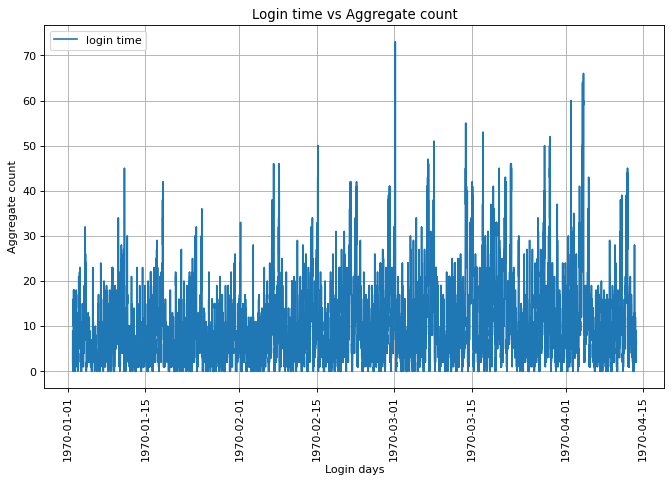

In [16]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80) #set the figure size to 10,6. set resolution to 80 using dpi.

# Plot Aggregate
ax.plot(agg_15m, label='login time') #plot the entire dataframe
#add titles and axis label
ax.set_xlabel('Login days')
ax.set_ylabel('Aggregate count')
ax.set_title('Login time vs Aggregate count')
ax.grid(True) #turn on grid
plt.xticks(rotation=90)
ax.legend(loc='upper left'); # add legend to upper left corner

The number of counts increased drastically at some points(above 50), example the login days aroung March 2nd. I need a close view to pinpoint the exact day responsible for the drastic increase. First i will take a look at the counts less than 50.

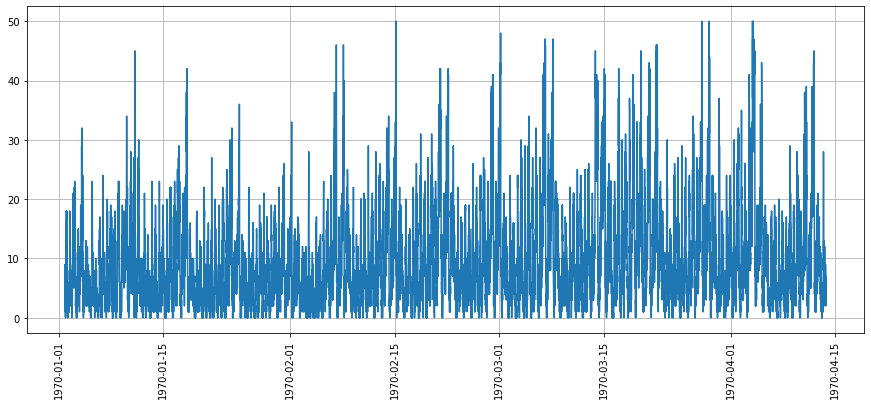

In [17]:
plt.figure(figsize=(15,6))
plt.plot(agg_15m.loc[agg_15m['count']<=50]) # visualizing aggregates less than or equal to 50. this will correspond to login times that icreased drastically.
plt.xticks(rotation=90) 
plt.grid()
plt.show()

still not very helpful, although it is becoming clear that there are alot of login time between 30 and 50.

In [18]:
a= agg_15m.loc[agg_15m['count']>50]  #get only login times above 50 using the count column

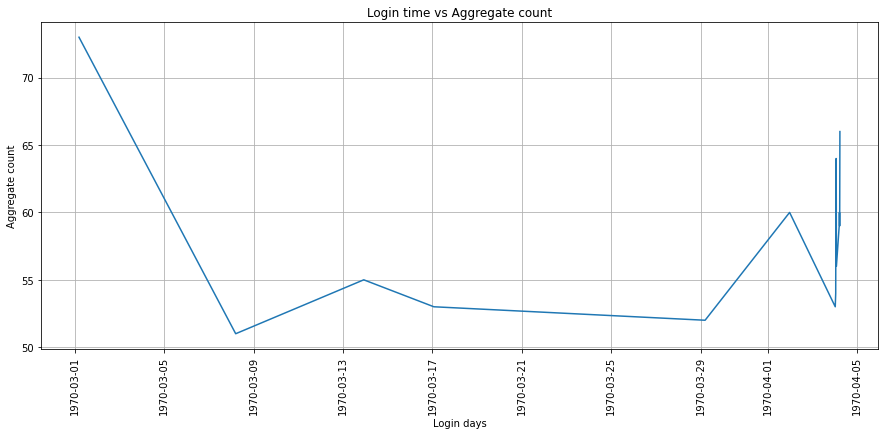

In [19]:
plt.figure(figsize=(15,6))
plt.plot(a) # lets take a look at the login times above 50
plt.xticks(rotation=90) 
plt.xlabel('Login days')
plt.ylabel('Aggregate count')
plt.title('Login time vs Aggregate count')
plt.grid()
plt.show()

Now we can see a drastic increases at 55, 60, somewhere around 64, 66 and possibly 72. I will pull out each of these info to see what the time of the days is as well

In [20]:
agg_15m.loc[agg_15m['count']==55]

,count
login_time,
1970-03-13 22:15:00,55


In [21]:
agg_15m.loc[agg_15m['count']==60]

,count
login_time,
1970-04-01 23:30:00,60
1970-04-04 05:00:00,60


In [22]:
agg_15m.loc[agg_15m['count']==73]

,count
login_time,
1970-03-01 04:30:00,73


we see that there were more logins at 10:15pm on march 13th, 1970(Friday, 55 counted), 11:30pm on April 1st(Wednesday, 60 counted), 5am on April 4th(Saturday, 60 counted), and March 1st at 04:30am(Sunday, 73 counted)

In [23]:
b= agg_15m[(agg_15m['count']>=30) & (agg_15m['count']<=50)] # get the login times greater than or equal to 30 but less than or equal to 50

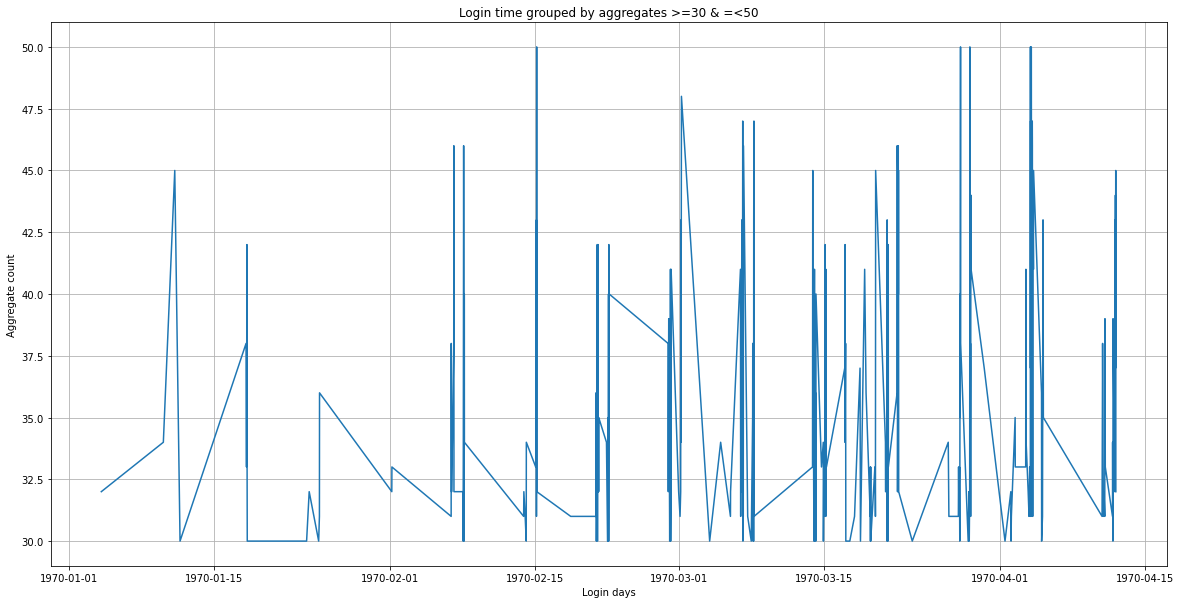

In [24]:
plt.figure(figsize=(20,10))
plt.plot(b)
plt.xlabel('Login days')
plt.ylabel('Aggregate count')
plt.title('Login time grouped by aggregates >=30 & =<50')
plt.grid()
plt.show()

Once again we see 4 sparks for login time happening at 50 and many more under 50. I will take a look at logins between 40 and 50 to see if i can find a pattern using the result from the logins above 50 earlier.

In [25]:
c= agg_15m[(agg_15m['count']>=45) & (agg_15m['count']<=50)]

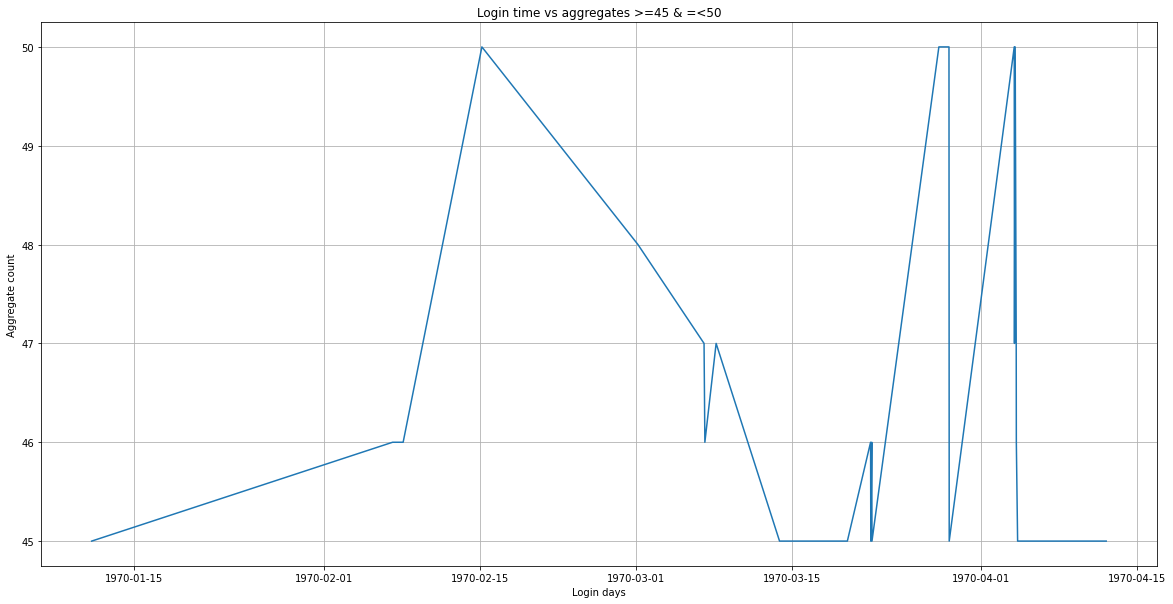

In [26]:
plt.figure(figsize=(20,10))
plt.plot(c)
plt.xlabel('Login days')
plt.ylabel('Aggregate count')
plt.title('Login time vs aggregates >=45 & =<50')
plt.grid()
plt.show()

login times that happened 50 times were 1970-02-15 at 04:45am(Sunday),1970-03-28 at 04:30am(Saturday), 1970-03-29 at 02:15am(Sunday), 1970-04-03 at 10:45pm(Friday), and 1970-04-04 at 12:45am(Saturday).

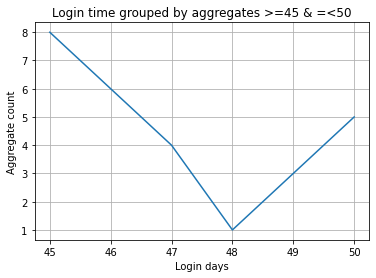

In [27]:
plt.plot(c.groupby('count').size())
plt.xlabel('Login days')
plt.ylabel('Aggregate count')
plt.title('Login time grouped by aggregates >=45 & =<50')
plt.grid()
plt.show()

login times that happened 45 times were more than those 50. Those login times are 1970-04-04 6am(Saturday),1970-04-12 04:45am(Saturday), 1970-03-29 02:45am(Sunday), 1970-03-22 04:30am(Sunday), 1970-03-22 02:00am(Sunday), 1970-03-19 11:30pm(Thursday), 1970-03-13 9:30pm(Friday), and 1970-01-11 04:45am(Wednesday). 

In [28]:
d= agg_15m[(agg_15m['count']>=45) & (agg_15m['count']<=73)]

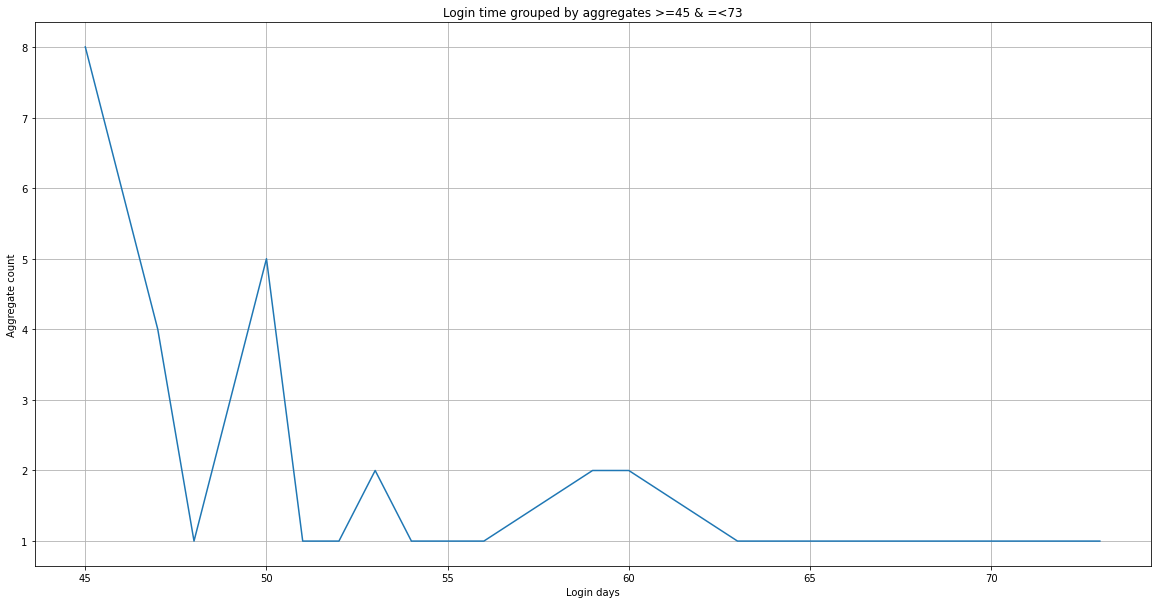

In [29]:
plt.figure(figsize=(20,10))
plt.plot(d.groupby('count').size())
plt.xlabel('Login days')
plt.ylabel('Aggregate count')
plt.title('Login time grouped by aggregates >=45 & =<73')
plt.grid()
plt.show()

In [30]:
c.sort_values(by='login_time', ascending = False).max()

count    50
dtype: int64

In [31]:
d.sort_values(by='login_time', ascending = False).max()

count    73
dtype: int64

The highest login time counted is 73 which is on Sunday but it only happened once. There were more logins during the weekend than days of the week like wednesdays and thursdays. Interestly the logins during the weekends(Saturdays and Sundays) were within 12am and 6am. Logins on Fridays happens in the evenings starting from 4pm into Saturday midnight. Occassionally more people login on Wednesdays and Thursdays nights.

# Part 2 ‑ Experiment and metrics design


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

Answer: Measure of success for the experiment would be more driver partners which received the reibursment will not change their behavior significantly instead a significant increase should be seen for drivers that doesn't take tolls before. This is because a driver that was taking the toll road is partial inelastic to toll prices. The ones that doesn't like taking lots of toll will start in the hope they will get reimbursement in the future.

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment

Answer: Monitor the drivers that received reimbursment to see if they there is any increase in the number of times they cross the bridge on the weekends. Monitor drivers that didn't receive the reimbursement to see if they start crossing the bridge

b. what statistical test(s) you will conduct to verify the significance of the
observation

Answer: I will run an A/B test. My null hyp(H0) will be that reimbursement doesn't affect the number of times drivers cross the bridge to each city. Alternative hyp(H1) will be that the number of drivers crossing the bridge to each city after reimbursement will increase significant on the weekends,


c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

Answer: Increase in the number of drivers on both cities on the weekends means that the toll reimbursement worked as intended. My recommendation will be: the test should be conducted all day of the week but decision should be made based on weekend results. My assumptions is that some drivers may start adding shifts since toll fees were reimbursed which means they have extra cash to invest into their ride business. 

# Part 3 ‑ Predictive modeling


Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

Answer: done at the beginning
    
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).
Data description
● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYYMMDD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [32]:
df.head(5) #the ultimate dataset was loaded before but i will like to see it again

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [34]:
df.describe() #obtain the statistical info

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


Both drivers and users have received 1 star rating at some point. 75% of rides in the first 30 days is 3 and 6.9 miles ride. The mean is 2 per a month basically.

In [35]:
df.corr() #checking how each feature correlates with one another

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,1.000000,-0.011060,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039097
avg_rating_of_driver,-0.011060,1.000000,-0.021653,-0.003290,-0.001916,0.012587,0.028508,0.101660
avg_surge,-0.001841,-0.021653,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010498
surge_pct,0.005720,-0.003290,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.019964
ultimate_black_user,0.112210,-0.001916,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009328
weekday_pct,0.050388,0.012587,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020366
avg_dist,-0.136329,0.028508,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.079793
avg_rating_by_driver,-0.039097,0.101660,0.010498,0.019964,0.009328,0.020366,0.079793,1.000000


there is a strong correlation between avg_surge and avg_pct as can be seen on the heatmap below too.

<AxesSubplot:>

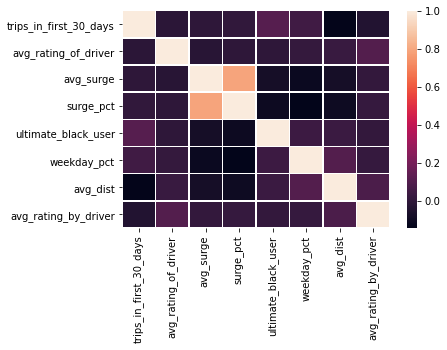

In [36]:
sns.heatmap(df.corr(), linewidths=.5)

it seems like a user is expected to take a ride in the first 30 days to be considered active based on the columns. I am making this assumption there is no column that records if a user is active por not. 

I will need to define a couple of new columns to properly build my model. If a user isn't active in the last 30 days, we call the user an active rider. so active_riders will be our new column for counting active users. 

In [37]:
days_change = timedelta(days=30) #setting the day limit for calling a user a dropper

In [38]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date']) #converting the last trip date column to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [39]:
dropper = df['last_trip_date'].max() - days_change # the dropper will be the max of the last trip date took minus the dropper limit
dropper

Timestamp('2014-06-01 00:00:00')

from here on any user that doesn't meet the dropper criteria will be labeled inactive denoted with 0, active will mean 1.

In [40]:
df['active_riders'] = np.where( df['last_trip_date'] >= dropper, 1,0)  #new column for keeping track of active riders

From my experience, some users may not take ride frequently and might even if not use the service in the first 30 days. those kind of users i will call occasional riders(oc_riders)

In [41]:
#create a new column to store riders with anything more than 0 as their average distance.
df['new_avg_dist'] =df['avg_dist'] >0 #turn the avg distance values to bool true or false
df['new_avg_dist'] = df['new_avg_dist'].replace({True: 1, False: 0}) #turn all the true to 1 and false to 0
df['new_avg_dist'] #print out the result.

0        1
1        1
2        1
3        1
4        1
        ..
49995    1
49996    0
49997    1
49998    1
49999    1
Name: new_avg_dist, Length: 50000, dtype: int64

df['ad'] = df['avg_dist'].replace({True: 1, False: 0})

In [42]:
df['oc_riders'] = np.where( (df['trips_in_first_30_days']  == 0 & df['new_avg_dist'].loc[1]),1,0) #a user with 1 in this column is an occassional rider. 

In [43]:
df.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_riders,new_avg_dist,oc_riders
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,1,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,1,1
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,1,0


Now we see that even if a rider isn't active, the rider could still be using the service seasonally or occasionally as seen on 2nd row.

# Explore the data

Text(0.5, 1.0, 'Trips in 30days vs City')

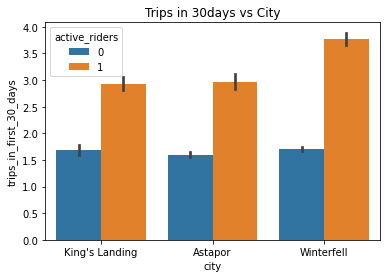

In [44]:
ax = sns.barplot(data=df, x = 'city',y= 'trips_in_first_30_days', hue = 'active_riders') #plotting active riders by city and first 30days trip
ax.set_title("Trips in 30days vs City")

Winterfell has the most active riders who actually started using the service after sign up in 30 days.

Text(0.5, 1.0, 'Average distance vs City')

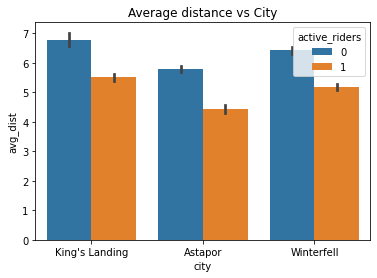

In [45]:
ax = sns.barplot(data=df, x = 'city',y= "avg_dist", hue = 'active_riders') #plotting active riders by city and first 30days trip
ax.set_title("Average distance vs City")

It turns out that when average distance is considered, most of the active riders in King's landing request longer rider compare to those in Winterfell

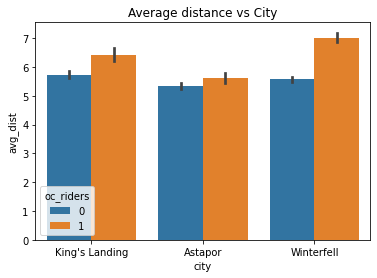

In [46]:
ax = sns.barplot(data=df, x = 'city',y= "avg_dist", hue = 'oc_riders') #plotting active riders by city and first 30days trip
ax.set_title("Average distance vs City")
plt.show()

This makes sense now as most of the active riders in the Winterfell were also part of the occassional riders too. Although Astapor had more activer riders, the number of occassional riders is relatively low in compared to its active riders. 

Text(0.5, 1.0, 'Average distance vs Phone')

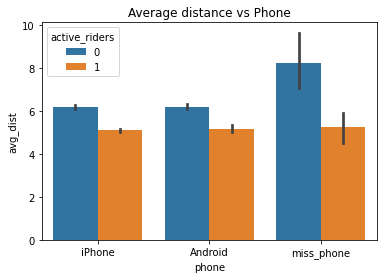

In [47]:
ax = sns.barplot(data=df, x = 'phone',y= "avg_dist", hue = 'active_riders') #plotting active riders by city and first 30days trip
ax.set_title("Average distance vs Phone")


From the above, we can say that the type of phone a rider owns doesn't significantly affect how the distance or whether the rider will be active or not.

In [48]:
names_list = ["city", "signup_date", "last_trip_date", "phone", "ultimate_black_user", "surge_pct", "weekday_pct", "oc_riders",
             "new_avg_dist"]
df.drop(columns=names_list, inplace=True)

In [49]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,avg_dist,avg_rating_by_driver,active_riders
0,4,4.7,1.10,3.67,5.0,1
1,0,5.0,1.00,8.26,5.0,0
2,3,4.3,1.00,0.77,5.0,0
3,9,4.6,1.14,2.36,4.9,1
4,14,4.4,1.19,3.13,4.9,0


# Train/Split

In [50]:
x = df.drop(columns='active_riders')
y = df.active_riders
# The test_size--> train with 70% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, 
                                                    random_state=27)

In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(37500, 5) (37500,)
(12500, 5) (12500,)


# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df[['trips_in_first_30_days','avg_dist']].values, 
                                              (df.active_riders == 1).values,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.65984


# Tuning the model

In [53]:
from sklearn.model_selection import KFold

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [54]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.6566933333333334


# Cross validation and Grid search

# Black Box Grid Search

In [55]:
from sklearn.model_selection import GridSearchCV

model=LogisticRegression()
Cs = {'C': [0.001, 0.1, 1, 10, 100]}
b_model= GridSearchCV(model, Cs, cv=5)
b_model.fit(Xlr, ylr)
y_pred=b_model.predict(Xtestlr)
acc_score = accuracy_score(ytestlr, y_pred)
acc_score

0.65984

In [56]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5): # this function implement clf as a dictionary and split thr training sets into 5 folds.
    gs = sklearn.model_selection.GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_) #prints the best value of the parameters
    best = gs.best_estimator_
    return best #returns the best classifier

In [57]:
from sklearn.model_selection import train_test_split

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain) # obtaining the best classify using cv_optimize
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [58]:
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from matplotlib.colors import ListedColormap

In [59]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection

c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, 
                cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, 
               s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, 
               alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, 
                     cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, 
                           colorscale=colorscale, cdiscrete=cdiscrete, 
                           psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    #plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

In [60]:

clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           df, ['trips_in_first_30_days','avg_dist'], 'active_riders', 1)

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.66
Accuracy on test data:     0.66


<ipython-input-59-c11e95cd7d8f>:57: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
<ipython-input-59-c11e95cd7d8f>:58: UserWarning: The following kwargs were not used by contour: 'axes'
  cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)


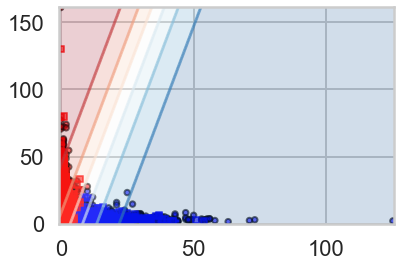

In [61]:
plt.figure()
ax = plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=30, alpha=0.6);
plt.show()

The figure above showed the results of the logistic regression, we plot the actual labels of both the training(circles) and test(squares) samples. The 0's (non_active) are plotted in red, the 1's (active) in blue. We also show the classification boundary. Notice that most of the samples are classified well, but there are a little bit of misclassified riders on both sides, as evidenced by mixture of dots or squares of one color onto the side of the other color. Both test and traing accuracy are about 66%.